# Yandex.Afisha Cohort Analysis

Yandex Afisha is a subsidiary of Yandex LLC, a multinational Russian technology company that provides internet related products and services. The company first launched in 1997. 

This cohort analysis will explore the business metrics of Yandex Afisha; an app and website that helps users find out about events like movie showings, exhibitions, gigs, concerts and buy tickets. The data has been collected from 2017 through 2018. The analysis will explore various customer, date and revenue attributes. Our objective is to incorporate data visualization techniques and business analysis tools to uncover patterns, correlations, and unique characteristics within the data sets.

The following project will work with site visitor, buyer and costs.

By doing so, we can identify key factors to help the marketing department from Yandex make effective investments in marketing, have an overview of the effectiveness of current marketing efforts, get a visualization of return rates and other customer metrics.  

The data that will be used for this analysis spans from June of 2017 to May of 2018. It includes server logs on customer visits, dump file with all orders for the given time frame and marketing/costs expenses. 


Customer behavior to be analyized:
- How people use the product
- When they start to buy
- How much money each customer brings
- When they pay off



Peliminary steps that will be taken to perform the analysis:
1. Installing necessary libraries
2. Preprocessing of the supplied data / data cleaning
3. Cohort Analysis. This will cover Product, Sales and Marketing data. 
   - Product Analysis (user behaviors and retention rate)
   - Sales Analysis (conversion rate, purchase size, LTV)
   - Marketing Analysis (Marketing costs, CAC, ROMI)
4. Give Conclusion and Reccomendations. 
   - What sources/platforms would you recommend? 
   - Back up your choice: what metrics did you focus on? Why? 
   - What conclusions did you draw after finding the metric values?




### Importing required libraries

In [1]:
import pandas as pd
import numpy as np

# Plotting 
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

The basic libraries that are essential are pandas and numpy.  Plotting libraries are subject to change depending on how one wishes to code and what one chooses to work with. By using the three plotting libraries listed, this will make visualization more diverse. 

# Data upload and cleaning

There are 4 columns between all the datasets that are object types. To better optimize the files, the object types will be converted but first to analyze them individaully to see what they are. This was already done in the 'Description of data' so we can go ahead and convert the object types. This will be done by going back to the dataset upload and using parse and dtype functions.   

In [2]:
try:
    visits = pd.read_csv('visits_log_us.csv', dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts'],) 
    orders = pd.read_csv('orders_log_us.csv', parse_dates=['Buy Ts'])
    costs = pd.read_csv('costs_us.csv', parse_dates=['dt'])
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts'],)
    orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
    costs = pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'])

visits.info(memory_usage='deep')
print()
orders.info(memory_usage='deep')
print()
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 t

Checking for null values as part of the data cleaning phase.  The number of enteries(RangeIndex) match the number of non-null values for all the dataframe columns.  This shows that there are zero null values in each of the data frame rows.

Checking for duplicates

In [3]:
visits.duplicated().sum()

0

In [4]:
orders.duplicated().sum()

0

In [5]:
costs.duplicated().sum()

0

After another data cleaning quick check, we can see there are no null values or duplicates rows.  All time/data columns have been changed to the apporiate data types to start. 

# Product Analysis
### Questions to answer
1. How many people use it every day, week, and month?
2. How many sessions are there per day? (One user might have more than one session.)
3. What is the length of each session?
4. What's the user retention rate?

For this section we will use the visits dataset.
The visits table (server logs with data on website visits):
- Uid — user's unique identifier
- Device — user's device
- Start Ts — session start date and time
- End Ts — session end date and time
- Source Id — identifier of the ad source the user came from



To calculate weekly and monthly activity, we'll first create separate columns for year, month, and week values.

In [6]:
#the following code will allow us to separate specific date values; month, week, year and days
visits['year'] = visits['Start Ts'].dt.isocalendar().year
visits['month'] = visits['Start Ts'].astype('datetime64[M]')
visits['week']  = visits['Start Ts'].astype('datetime64[W]')
visits['date'] = visits['Start Ts'].dt.date


In [7]:
visits.head(2) #just a quick look at the update df after incorporating the extra dates

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   

                    Uid  year      month       week        date  
0  16879256277535980062  2017 2017-12-01 2017-12-14  2017-12-20  
1    104060357244891740  2018 2018-02-01 2018-02-15  2018-02-19

### How many people use it every day, week, and month?

To see this, we'll determine the Daily, Weekly, and Monthly average users. This is where the date separation will come in handy.

The .agg function allows us to apply a function to one axis of the dataframe, here it will be the 'Uid' user id column to get distinct users ids

In [8]:
# Groups the visits df by the selected date parts, 
DAU = visits.groupby('date').agg({'Uid': 'nunique'}).mean().round() 
WAU = visits.groupby('week').agg({'Uid': 'nunique'}).mean().round()
MAU = visits.groupby('month').agg({'Uid': 'nunique'}).mean().round()


print("On average there are:",int(DAU), "daily users")
print("On average there are:",int(WAU), "weekly users")
print("On average there are:",int(MAU), "monthly users")

On average there are: 908 daily users
On average there are: 5724 weekly users
On average there are: 23228 monthly users


## DAU
### Daily Average Users

In [9]:
#This shows how the daily users are allocated per date. 
#'year' was added to dau df so that when it comes to plotting the data, it can been grouped by year on the graph.
dau=visits.groupby(['year','date'])['Uid'].nunique().reset_index()
dau.head()

year        date  Uid
0  2017  2017-06-01  605
1  2017  2017-06-02  608
2  2017  2017-06-03  445
3  2017  2017-06-04  476
4  2017  2017-06-05  820

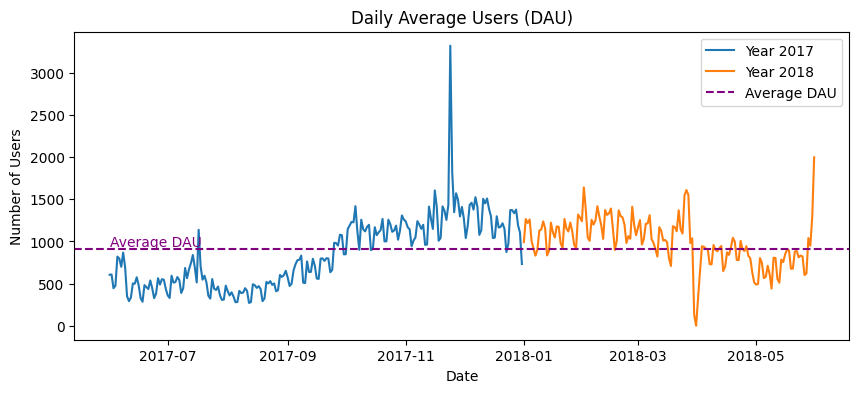

In [10]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 4))

# Plotting the line for DAU
for year, group in dau.groupby('year'):
    ax.plot(group['date'], group['Uid'], label=f'Year {year}')

# Adding reference line for average DAU over time
average_dau = dau['Uid'].mean()
ax.axhline(y=average_dau, color='purple', linestyle='--', label='Average DAU')
ax.text(dau['date'].min(), average_dau, 'Average DAU', color='purple', ha='left', va='bottom')

# Customizing the plot
ax.set_title('Daily Average Users (DAU)')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Users')
ax.legend()

plt.show()

<b>Insight:</b> for the most part, the majority of data is around the average reference line. The main spike in DAU happened on November 24th. A possible explanation for this could be due to pre-christmas sale? More data would need to be collected to say for sure. Another area to look into is the dip in the 2018 data for March 31st; what outside factors could have contributed to the dip?

## WAU
### Weekly Average Users

In [11]:
wau=visits.groupby(['year','week'])['Uid'].nunique().reset_index()
wau.head()

year       week   Uid
0  2017 2017-06-01  4082
1  2017 2017-06-08  3311
2  2017 2017-06-15  2844
3  2017 2017-06-22  3079
4  2017 2017-06-29  3055

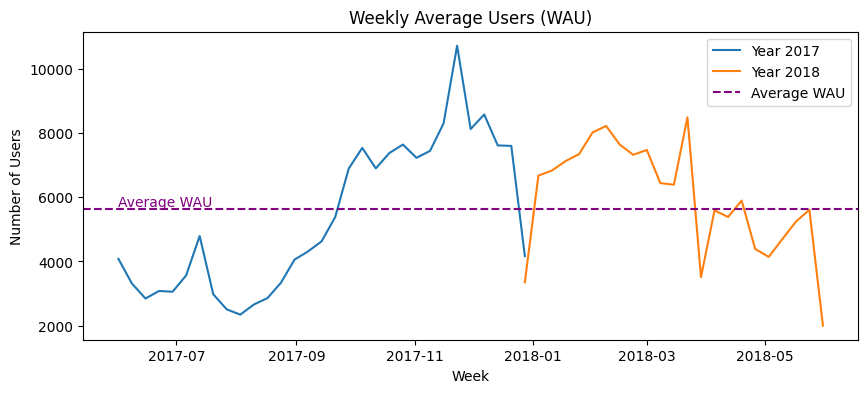

In [12]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 4))

# Plotting the line for WAU
for year, group in wau.groupby('year'):
    ax.plot(group['week'], group['Uid'], label=f'Year {year}')

# Adding reference line for average WAU over time
average_wau = wau['Uid'].mean()
ax.axhline(y=average_wau, color='purple', linestyle='--', label='Average WAU')
ax.text(wau['week'].min(), average_wau, 'Average WAU', color='purple', ha='left', va='bottom')

# Customizing the plot
ax.set_title('Weekly Average Users (WAU)')
ax.set_xlabel('Week')
ax.set_ylabel('Number of Users')
ax.legend()

plt.show()

<b>Insight:</b> Here you can distinctivly see the separate years. If we focus on 2017, you can see that half of the time, the weekly average users were below average. This could be due to the site start up phase and word getting out about the product.

2018 the data is more established and the majority of users are above or near average. More information is needed to further explain the uncharacteristic dip in users for the end of March. The company may have had some kind of external force such as server or company issues.

## MAU
### Monthly Average Users

In [13]:
mau=visits.groupby(['year','month'])['Uid'].nunique().reset_index()
mau.head()

year      month    Uid
0  2017 2017-06-01  13259
1  2017 2017-07-01  14183
2  2017 2017-08-01  11631
3  2017 2017-09-01  18975
4  2017 2017-10-01  29692

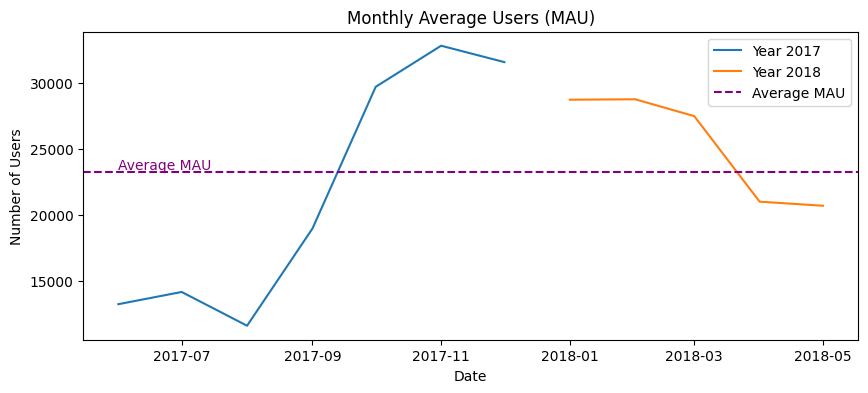

In [14]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 4))

# Plotting the line for MAU
for year, group in mau.groupby('year'):
    ax.plot(group['month'], group['Uid'], label=f'Year {year}')

# Adding reference line for average MAU over time
average_mau = mau['Uid'].mean()
ax.axhline(y=average_mau, color='purple', linestyle='--', label='Average MAU')
ax.text(mau['month'].min(), average_mau, 'Average MAU', color='purple', ha='left', va='bottom')

# Customizing the plot
ax.set_title('Monthly Average Users (MAU)')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Users')
ax.legend()

plt.show()

The gap is due to the change in years and the data for December not going to the end of the month. The Average User plots are just different variation of the same date.  There is noticeable decline starting to happen from March-April 2018

## How many sessions per day?


In [15]:
#year, month, number of sessions and number of users are the parameters to look at.

#groups the dataset by year, then by each day of the year for distinct user ids
sessions_per_user =visits.groupby(['date']).agg({'Uid': ['count', 'nunique']})
sessions_per_user.columns = ['no._sessions', 'no._visitors']#creates columns to hold the number of sessions and visitors per day
sessions_per_user['sessions_per_user'] = (sessions_per_user['no._sessions'] / sessions_per_user['no._visitors'])#calculates sessions/day
overview = pd.merge(visits, orders, on = 'Uid', how = "inner")
sessions_per_user.head().round(2) #rounds the session number to two decimal places



no._sessions  no._visitors  sessions_per_user
date                                                     
2017-06-01           664           605               1.10
2017-06-02           658           608               1.08
2017-06-03           477           445               1.07
2017-06-04           510           476               1.07
2017-06-05           893           820               1.09

<b>Insights:</b> The above is just a quick overview of daily data.  Number of sessions and users are fairly close in size with number of sessions being slightly higher.  This denotes that some users had more than one session which can been seen by the 'session_per_user' column. Numbers over 1.05 show that a few users have had more than one session. 

In [16]:
#Number of Sessions per day. 
dses=visits.groupby(['date'])['Uid'].count().reset_index()
dses.rename(columns={'Uid':'daily_sessions'}, inplace=True) #this is just to rename the Uid column number of sessions for
#this 'dses' table only
dses

date  daily_sessions
0    2017-06-01             664
1    2017-06-02             658
2    2017-06-03             477
3    2017-06-04             510
4    2017-06-05             893
..          ...             ...
359  2018-05-27             672
360  2018-05-28            1156
361  2018-05-29            1035
362  2018-05-30            1410
363  2018-05-31            2256

[364 rows x 2 columns]

<b> Insight:</b>  The brief overview of the number of daily sessions shows that 2018 was more established with almost double the user count. 2017 low numbers can be contributed to start up marketing efforts and the platform being new. Would like to know when the platform came online for a broader trend analysis.

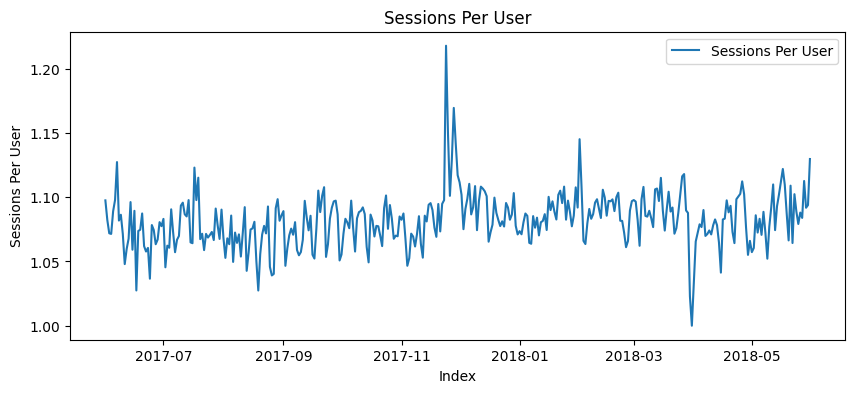

In [17]:
# Plot sessions per user
plt.figure(figsize=(10, 4))
plt.plot(sessions_per_user['sessions_per_user'], linestyle='-', label='Sessions Per User')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Sessions Per User')
plt.title('Sessions Per User')
plt.legend()

# Show the plot
plt.show()

This small graph of sessions per user shows how the majority of sessions that users have fall between the 1.05 and 1.1 number of sessions. 

In [18]:
print('Average sessions per user: {:.2f}'.format(sessions_per_user['sessions_per_user'].mean()))

Average sessions per user: 1.08


## Length of each session

In [19]:
#dividing by seconds to get session duration in minutes

visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
visits.head()

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid  year      month       week        date  \
0  16879256277535980062  2017 2017-12-01 2017-12-14  2017-12-20   
1    104060357244891740  2018 2018-02-01 2018-02-15  2018-02-19   
2   7459035603376831527  2017 2017-07-01 2017-06-29  2017-07-01   
3  16174680259334210214  2018 2018-05-01 2018-05-17  2018-05-20   
4   9969694820036681168  2017 2017-12-01 2017-12-21  2017-12-27   

   session_duration_sec  
0                  1080  
1                  1680  
2                     0  
3                  1440  
4                     0

<AxesSubplot:>

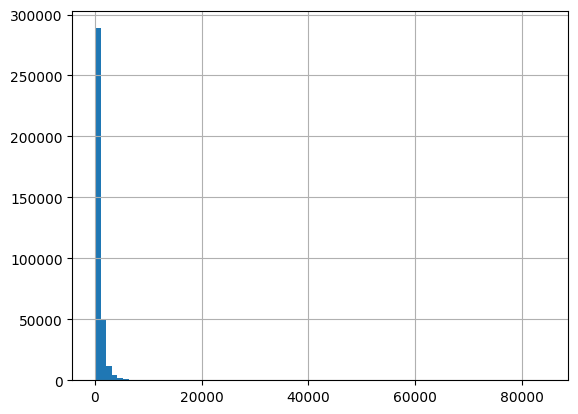

In [20]:
visits['session_duration_sec'].hist(bins=80) 

In [21]:
visits['session_duration_sec'].mode() #average session length

0    60
dtype: int64

<b>Insight:</b> From unusally large spike of 0's, it seems to correlate with visitors that have 0 conversion days.  

On average, a user spends 1 minute/60 seconds on the app. This time should be enough to find the event of interest, but most likely it will take more time to buy tickets through the Yandex.Afisha application. You need to understand whether people completely lose interest in what they have found, or go to other resources to buy a ticket there.

## User Retention Rate
Retention shows us how many users (in % out of registered) were active (had sessions) on a certain day/week/month after registration/first visit. 

In [22]:
visits.head(2) #just a view of the table to see what we are working with

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   

                    Uid  year      month       week        date  \
0  16879256277535980062  2017 2017-12-01 2017-12-14  2017-12-20   
1    104060357244891740  2018 2018-02-01 2018-02-15  2018-02-19   

   session_duration_sec  
0                  1080  
1                  1680

In [23]:
#create a 'visits_month' column to aid in cohort analysis
import datetime as dt #to work with dates

#function for month - this is will just have the year and month with the day being defaulted to 1
def get_month(x):
        return dt.datetime(x.year, x.month,1)
#apply the function    
visits['visit_month'] = visits['Start Ts'].apply(get_month)
visits.head()

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid  year      month       week        date  \
0  16879256277535980062  2017 2017-12-01 2017-12-14  2017-12-20   
1    104060357244891740  2018 2018-02-01 2018-02-15  2018-02-19   
2   7459035603376831527  2017 2017-07-01 2017-06-29  2017-07-01   
3  16174680259334210214  2018 2018-05-01 2018-05-17  2018-05-20   
4   9969694820036681168  2017 2017-12-01 2017-12-21  2017-12-27   

   session_duration_sec visit_month  
0                  1080  2017-12-01  
1                  1680  2018-02-01  
2                     0  2017-07-01  
3                  1440  2018-05-01  
4                     0  2017-12-01

In [24]:
#create cohort month based on visit month. first month of user's visit. creating a column index for month cohort
#first month user visited
visits['cohort_month'] = visits.groupby('Uid')['visit_month'].transform('min')#'min' used to get the first occurance  
visits.head()

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid  year      month       week        date  \
0  16879256277535980062  2017 2017-12-01 2017-12-14  2017-12-20   
1    104060357244891740  2018 2018-02-01 2018-02-15  2018-02-19   
2   7459035603376831527  2017 2017-07-01 2017-06-29  2017-07-01   
3  16174680259334210214  2018 2018-05-01 2018-05-17  2018-05-20   
4   9969694820036681168  2017 2017-12-01 2017-12-21  2017-12-27   

   session_duration_sec visit_month cohort_month  
0                  1080  2017-12-01   2017-12-01  
1                  1680  2018-02-01   2018-02-01  
2                     0  2017-07-01   2017-07-01  
3                  1440  2018-05-01   2018-03-01  
4                     0  2017-12-01   2017-12-01

Cohort month shows the first time the User has visited. This data will be used later in the coding process for Retention Rate.

In [25]:
#create date element function to get a series for subtraction
def get_date_elements(df,column):
    day = df[column].dt.day # this will be applied to cohort month column
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year


In [26]:
#get date elements for visit and cohort columns

#_ because we are focusing on month and need 3 elements so '_' acts as a place holder
_,visit_month, visit_year = get_date_elements(visits, 'visit_month') #_ because we are focusing on month and need 3 elements
_,cohort_month, cohort_year = get_date_elements(visits, 'cohort_month')

Getting the separate date elements will allow us to get the difference(in the following code below) to create the index. It will show us when the user was acquired, how long they have been active and retained. 

In [27]:
#create cohort index - when user acquired 
year_diff = visit_year - cohort_year
month_diff = visit_month - cohort_month

#adding +1 at the end is optional its for those that only visited on their first day
visits['cohort_index'] = year_diff*12+month_diff #multiply by 12 since 12 months in a year

visits.head(2)

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   

                    Uid  year      month       week        date  \
0  16879256277535980062  2017 2017-12-01 2017-12-14  2017-12-20   
1    104060357244891740  2018 2018-02-01 2018-02-15  2018-02-19   

   session_duration_sec visit_month cohort_month  cohort_index  
0                  1080  2017-12-01   2017-12-01             0  
1                  1680  2018-02-01   2018-02-01             0

Customers with an cohort index of 0(Conversion 0d), were acquired and active within the same month. 

In [28]:
#count user ids by groupby by customer, cohort month(when they were acquired) and index(how long they've been active)
#used apply for better reliability
cohort_data = visits.groupby(['cohort_month', 'cohort_index'])['Uid'].apply(pd.Series.nunique).reset_index()
#reset index eliminates gaps (each row has the cohort month filled in)
cohort_data

cohort_month  cohort_index    Uid
0    2017-06-01             0  13259
1    2017-06-01             1   1043
2    2017-06-01             2    713
3    2017-06-01             3    814
4    2017-06-01             4    909
..          ...           ...    ...
73   2018-03-01             1    861
74   2018-03-01             2    557
75   2018-04-01             0  15709
76   2018-04-01             1    760
77   2018-05-01             0  15273

[78 rows x 3 columns]

The values for the 'Uid' column above is a count of user ids. This data will be used for a pivot table. 

In [29]:
#create pivot table
cohort_table = cohort_data.pivot(index = 'cohort_month', columns=['cohort_index'], values= 'Uid')
cohort_table

cohort_index       0       1       2       3      4      5      6      7   \
cohort_month                                                                
2017-06-01    13259.0  1043.0   713.0   814.0  909.0  947.0  809.0  766.0   
2017-07-01    13140.0   737.0   674.0   738.0  765.0  633.0  596.0  601.0   
2017-08-01    10181.0   783.0   640.0   639.0  510.0  448.0  370.0  402.0   
2017-09-01    16704.0  1428.0  1156.0   847.0  658.0  632.0  599.0  404.0   
2017-10-01    25977.0  2042.0  1357.0  1012.0  890.0  837.0  555.0  529.0   
2017-11-01    27248.0  2133.0  1202.0  1054.0  919.0  638.0  594.0    NaN   
2017-12-01    25268.0  1410.0   960.0   786.0  512.0  481.0    NaN    NaN   
2018-01-01    22624.0  1351.0   890.0   565.0  458.0    NaN    NaN    NaN   
2018-02-01    22197.0  1267.0   565.0   446.0    NaN    NaN    NaN    NaN   
2018-03-01    20589.0   861.0   557.0     NaN    NaN    NaN    NaN    NaN   
2018-04-01    15709.0   760.0     NaN     NaN    NaN    NaN    NaN    NaN   
2018-05-01    15273.0     NaN     NaN     NaN    NaN    NaN    NaN    NaN   

cohort_index     8      9      10     11  
cohort_month                              
2017-06-01    694.0  674.0  539.0  596.0  
2017-07-01    510.0  376.0  361.0    NaN  
2017-08-01    284.0  265.0    NaN    NaN  
2017-09-01    381.0    NaN    NaN    NaN  
2017-10-01      NaN    NaN    NaN    NaN  
2017-11-01      NaN    NaN    NaN    NaN  
2017-12-01      NaN    NaN    NaN    NaN  
2018-01-01      NaN    NaN    NaN    NaN  
2018-02-01      NaN    NaN    NaN    NaN  
2018-03-01      NaN    NaN    NaN    NaN  
2018-04-01      NaN    NaN    NaN    NaN  
2018-05-01      NaN    NaN    NaN    NaN

In [30]:
#to find the rentention percentages - dividing each month of activity with the cohort to get retention rate
retention_percentage = cohort_table.divide(cohort_table.iloc[:,0], axis=0).round(4)
#divide cohort table. isoloate with iloc. give me all the rows with just the first column[:,0].  divide by row(axis=0)
retention_percentage

cohort_index   0       1       2       3       4       5       6       7   \
cohort_month                                                                
2017-06-01    1.0  0.0787  0.0538  0.0614  0.0686  0.0714  0.0610  0.0578   
2017-07-01    1.0  0.0561  0.0513  0.0562  0.0582  0.0482  0.0454  0.0457   
2017-08-01    1.0  0.0769  0.0629  0.0628  0.0501  0.0440  0.0363  0.0395   
2017-09-01    1.0  0.0855  0.0692  0.0507  0.0394  0.0378  0.0359  0.0242   
2017-10-01    1.0  0.0786  0.0522  0.0390  0.0343  0.0322  0.0214  0.0204   
2017-11-01    1.0  0.0783  0.0441  0.0387  0.0337  0.0234  0.0218     NaN   
2017-12-01    1.0  0.0558  0.0380  0.0311  0.0203  0.0190     NaN     NaN   
2018-01-01    1.0  0.0597  0.0393  0.0250  0.0202     NaN     NaN     NaN   
2018-02-01    1.0  0.0571  0.0255  0.0201     NaN     NaN     NaN     NaN   
2018-03-01    1.0  0.0418  0.0271     NaN     NaN     NaN     NaN     NaN   
2018-04-01    1.0  0.0484     NaN     NaN     NaN     NaN     NaN     NaN   
2018-05-01    1.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

cohort_index      8       9       10     11  
cohort_month                                 
2017-06-01    0.0523  0.0508  0.0407  0.045  
2017-07-01    0.0388  0.0286  0.0275    NaN  
2017-08-01    0.0279  0.0260     NaN    NaN  
2017-09-01    0.0228     NaN     NaN    NaN  
2017-10-01       NaN     NaN     NaN    NaN  
2017-11-01       NaN     NaN     NaN    NaN  
2017-12-01       NaN     NaN     NaN    NaN  
2018-01-01       NaN     NaN     NaN    NaN  
2018-02-01       NaN     NaN     NaN    NaN  
2018-03-01       NaN     NaN     NaN    NaN  
2018-04-01       NaN     NaN     NaN    NaN  
2018-05-01       NaN     NaN     NaN    NaN

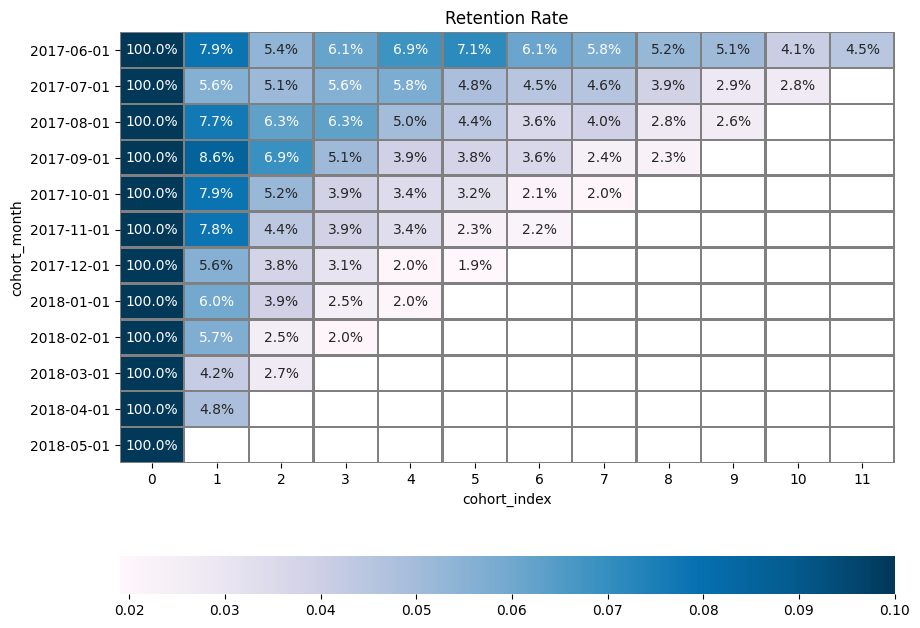

In [31]:
#retention heatmap
retention_percentage.index=retention_percentage.index.astype(str)
plt.figure(figsize=(10,8))
sns.heatmap(retention_percentage, annot=True, fmt='.1%', linewidths=1, cmap='PuBu', linecolor='grey',  vmax=0.1, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'Retention Rate')
plt.show()



<b>Insights:</b> The average retention rate from all cohorts decreased slowly over time. One of the few months to retain a somewhat steady user percentage was June. July, August and September faired better the the rest of the months as they were able to have a slightly higher average for most of the month. Towards the end of 2018 the rate had a declining trend. 

<b>Reccomendation:</b> May 2018 had no registerable data. The data for May 2018 needs more attention to see what is going on and why the data collection period wasn't for the entire month.  

<b><h3>Product Analysis Conclusion:</b></h3>  Yandex.Afisha sees an average of 900 users daily with each users having around 1 session.  The time spent on the site for that session is about 10 minutes. There was a significant spike in users around November 24th/Thanksgiving times which could be attributed to the holiday season. The 24th/25th of November is also one of the biggest shopping days of the year as a precursor to Christmas. Tickets may have been purchased as gifts but more user information would be need to to determine that. The spike in Users also coincides with an increase is session lenght to almost 18 minutes.  The site my have slowed due to server traffice. 

One area of concern is the plunge in both users and session lenght that occured around March 31st. With such a sharp decrease in both users and session length; a few things may have occured. It could be a site crash, site maintenance or voluntary/involuntary site take down but again, more information would be need to make a solid conclusion. 



# Sales

1. When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)
2. How many orders do they make during a given period of time?
3. What is the average purchase size?
4. How much money do they bring? (LTV)

For this section we will use the orders dataset.
The orders table (data on orders):
- Uid — unique identifier of the user making an order
- Buy Ts — order date and time
- Revenue — Yandex.Afisha's revenue from the order


In [32]:
orders.head(2)#quick df overview

Buy Ts  Revenue                   Uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447

In [33]:
visits.head(2) #quick df overivew

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   

                    Uid  year      month       week        date  \
0  16879256277535980062  2017 2017-12-01 2017-12-14  2017-12-20   
1    104060357244891740  2018 2018-02-01 2018-02-15  2018-02-19   

   session_duration_sec visit_month cohort_month  cohort_index  
0                  1080  2017-12-01   2017-12-01             0  
1                  1680  2018-02-01   2018-02-01             0

In [34]:
#this will merge the visits and orders df on Uid to help with KPI metrics. centralizing data to one df
overview = pd.merge(visits, orders, on = 'Uid', how = "inner")
overview['date'] =  pd.to_datetime(overview['date'], format="%Y-%m-%d")
overview.head(2)

Device              End Ts  Source Id            Start Ts  \
0  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
1  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   

                    Uid  year      month       week       date  \
0  16174680259334210214  2018 2018-05-01 2018-05-17 2018-05-20   
1  16174680259334210214  2018 2018-03-01 2018-03-08 2018-03-09   

   session_duration_sec visit_month cohort_month  cohort_index  \
0                  1440  2018-05-01   2018-03-01             2   
1                  1680  2018-03-01   2018-03-01             0   

               Buy Ts  Revenue  
0 2018-03-09 20:25:00     2.33  
1 2018-03-09 20:25:00     2.33

Luckily the visits df is already broken down by month/week/date to help with conversion analysis

In [35]:
#make sure date is correct datatype. data type was checked with the info function
overview['buy_date'] = overview['Buy Ts'].dt.date 

### Sales by Devices

In [36]:
grp = overview.groupby(['Device']).agg('Revenue').sum().round().reset_index()
grp['($) millions'] = (grp['Revenue']/1000000).apply(lambda x: '${:,.2f}M'.format(x))#this will format the output to currency
grp

Device    Revenue ($) millions
0  desktop  6447894.0       $6.45M
1    touch   514313.0       $0.51M

Desktop is the preferred  way to use the platform.  Not sure what 'touch' is; maybe mobile device or kiosk?

In [37]:
#Users per device
grp2 = overview.groupby(['Device']).agg('Uid').count().reset_index()
grp2

Device     Uid
0  desktop  713192
1    touch   48615

In [38]:
# let's add the order day, week, month and year to calculate the overall revenue for these time spans 
#similar to WAU & MAU

overview['order_week'] = overview['buy_date'].astype('datetime64[W]')
overview['order_month'] = overview['buy_date'].astype('datetime64[M]')

In [39]:
overview.head(2)#overview df to see date changes

Device              End Ts  Source Id            Start Ts  \
0  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
1  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   

                    Uid  year      month       week       date  \
0  16174680259334210214  2018 2018-05-01 2018-05-17 2018-05-20   
1  16174680259334210214  2018 2018-03-01 2018-03-08 2018-03-09   

   session_duration_sec visit_month cohort_month  cohort_index  \
0                  1440  2018-05-01   2018-03-01             2   
1                  1680  2018-03-01   2018-03-01             0   

               Buy Ts  Revenue    buy_date order_week order_month  
0 2018-03-09 20:25:00     2.33  2018-03-09 2018-03-08  2018-03-01  
1 2018-03-09 20:25:00     2.33  2018-03-09 2018-03-08  2018-03-01

In [40]:
# Let's calculate number of purchases and total revenue per week
#groups by order week. takes the Revenue and counts sales and sums it. 
wkly_rev = overview.groupby('order_week').agg({'Revenue': ['count', 'sum']})
wkly_rev.head()

Revenue          
             count       sum
order_week                  
2017-06-01    9052  47053.07
2017-06-08    5060  23155.84
2017-06-15    3445  33205.04
2017-06-22    6473  32851.31
2017-06-29    6382  52177.03

numpy.ndarray

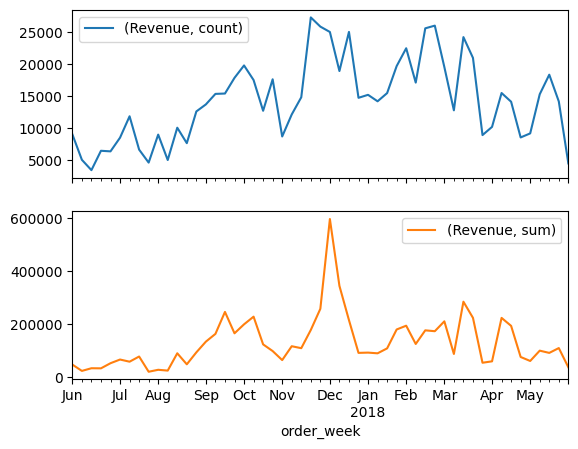

In [41]:
#quick plot to see how weekly revenue flows
axes = wkly_rev.plot.line(subplots=True)
type(axes)

The Revenue,count is the number of "Sales" vs. the value of those sales numbers; 'Revenue, sum'.  A spike in sales numbers equals spike in revenue. 

In [42]:
# Let's calculate number of purchases and total revenue per month
#groups by order month. takes the Revenue and counts sales and sums it. 
mnthly_rev = overview.groupby('order_month').agg({'Revenue': ['count', 'sum']})
mnthly_rev.head()

Revenue           
              count        sum
order_month                   
2017-06-01    25839  148121.29
2017-07-01    34369  253987.24
2017-08-01    35846  211562.04
2017-09-01    65156  738489.76
2017-10-01    73623  687489.99

numpy.ndarray

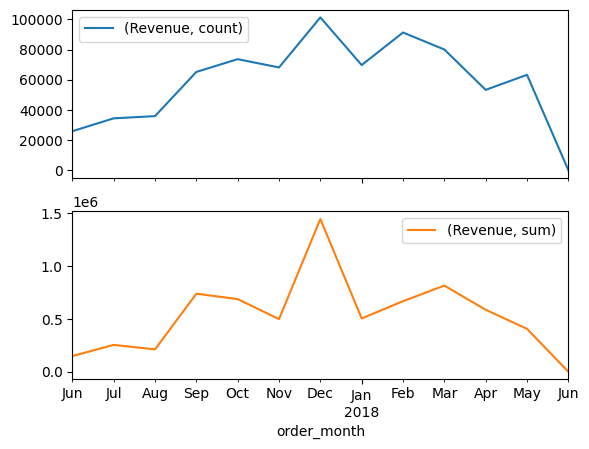

In [43]:
#quick plot to see monthly revenue flows
axes = mnthly_rev.plot.line(subplots=True)
type(axes)

<b> Insight:</b>  With a wider time frame the plots tend to be similar in shape as the fine detail is filtered out with the large date overview.

In [44]:
overview.head(2)

Device              End Ts  Source Id            Start Ts  \
0  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
1  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   

                    Uid  year      month       week       date  \
0  16174680259334210214  2018 2018-05-01 2018-05-17 2018-05-20   
1  16174680259334210214  2018 2018-03-01 2018-03-08 2018-03-09   

   session_duration_sec visit_month cohort_month  cohort_index  \
0                  1440  2018-05-01   2018-03-01             2   
1                  1680  2018-03-01   2018-03-01             0   

               Buy Ts  Revenue    buy_date order_week order_month  
0 2018-03-09 20:25:00     2.33  2018-03-09 2018-03-08  2018-03-01  
1 2018-03-09 20:25:00     2.33  2018-03-09 2018-03-08  2018-03-01

In [45]:
#revenue by source

rev_source = overview.groupby(['order_month','Source Id', ]).agg('Revenue').sum().reset_index()
rev_source.columns = ['ord_month', 'source', 'tot_rev']
rev_source.head()

ord_month  source   tot_rev
0 2017-06-01       1  51524.95
1 2017-06-01       2  49626.01
2 2017-06-01       3   7467.82
3 2017-06-01       4  13644.17
4 2017-06-01       5  23407.59

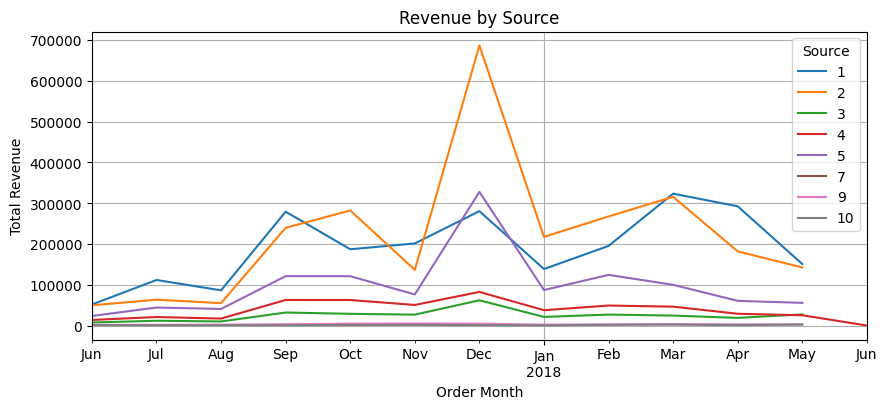

In [46]:
# Pivot the data to plot each source as a separate line
pivot_data = rev_source.pivot(index='ord_month', columns='source', values='tot_rev')

# Plotting with Matplotlib
fig, ax = plt.subplots(figsize=(10, 4))

pivot_data.plot(kind='line', ax=ax)

# Customize the plot
ax.set_title('Revenue by Source')
ax.set_xlabel('Order Month')
ax.set_ylabel('Total Revenue')
ax.legend(title='Source')
ax.grid(True)

# Show the plot
plt.show()

In [47]:
#How much revenue by source?
rev_source2 = overview.groupby(['Source Id'])['Revenue'].sum().reset_index()
pd.options.display.float_format = '{:,.2f}'.format #format number to have commas
rev_source2.head(15)

Source Id      Revenue
0          1 2,298,200.17
1          2 2,638,189.21
2          3   296,687.96
3          4   496,690.17
4          5 1,181,477.14
5          7         1.22
6          9    36,342.25
7         10    14,619.23

### Find the difference in days between the first order and first visit

In [48]:
#first order date
#let's find the date of the first order for each user. Using the overview table(combined data)
frst_Uorder = overview.groupby(['Uid'])['buy_date'].min().reset_index() #this will get first order date
frst_Uorder.columns = ['Uid', 'first_order_date'] #creates the columns that will be added to the visits df
frst_Uorder.head()


Uid first_order_date
0   313578113262317       2018-01-03
1  1575281904278712       2017-06-03
2  2429014661409475       2017-10-11
3  2464366381792757       2018-01-28
4  2551852515556206       2017-11-24

In [49]:
#now merging 'first order date' to the original dataset
overview = overview.merge(frst_Uorder, how='inner',on=['Uid'])
overview.head(2)

Device              End Ts  Source Id            Start Ts  \
0  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
1  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   

                    Uid  year      month       week       date  \
0  16174680259334210214  2018 2018-05-01 2018-05-17 2018-05-20   
1  16174680259334210214  2018 2018-03-01 2018-03-08 2018-03-09   

   session_duration_sec visit_month cohort_month  cohort_index  \
0                  1440  2018-05-01   2018-03-01             2   
1                  1680  2018-03-01   2018-03-01             0   

               Buy Ts  Revenue    buy_date order_week order_month  \
0 2018-03-09 20:25:00     2.33  2018-03-09 2018-03-08  2018-03-01   
1 2018-03-09 20:25:00     2.33  2018-03-09 2018-03-08  2018-03-01   

  first_order_date  
0       2018-03-09  
1       2018-03-09

In [50]:
#let's find the first session for each user
#this is for the first visit date.  first visit month was calculated earlier but this is for the entire date
first_ses = overview.groupby(['Uid'])['date'].min().reset_index()
first_ses.columns = ['Uid', 'first_session']
first_ses.head()

Uid first_session
0   313578113262317    2017-09-18
1  1575281904278712    2017-06-03
2  2429014661409475    2017-10-11
3  2464366381792757    2018-01-27
4  2551852515556206    2017-11-24

In [51]:
#this will merge the visits and orders df to allow us to see firt order and session dates per user
user_stats = pd.merge(first_ses, frst_Uorder, on = 'Uid', how = "inner")
user_stats.head()

Uid first_session first_order_date
0   313578113262317    2017-09-18       2018-01-03
1  1575281904278712    2017-06-03       2017-06-03
2  2429014661409475    2017-10-11       2017-10-11
3  2464366381792757    2018-01-27       2018-01-28
4  2551852515556206    2017-11-24       2017-11-24

From running the info() command on the user_stats, the dates in the small data frame are objects and need to be changed to date data types. 

In [52]:
#need to get the previous dates in the right data type
user_stats['first_session'] =  pd.to_datetime(user_stats['first_session'], format="%Y-%m-%d")
user_stats['first_order_date'] =  pd.to_datetime(user_stats['first_order_date'], format="%Y-%m-%d")

#determins the number of days between dates. 
user_stats['diff_days'] = (user_stats['first_order_date'] - user_stats['first_session']) / np.timedelta64(1, 'D')
user_stats.head(10)

Uid first_session first_order_date  diff_days
0   313578113262317    2017-09-18       2018-01-03     107.00
1  1575281904278712    2017-06-03       2017-06-03       0.00
2  2429014661409475    2017-10-11       2017-10-11       0.00
3  2464366381792757    2018-01-27       2018-01-28       1.00
4  2551852515556206    2017-11-24       2017-11-24       0.00
5  3077748354309989    2018-03-03       2018-03-03       0.00
6  3605148382144603    2017-08-15       2017-09-21      37.00
7  3753586865891862    2018-03-03       2018-03-03       0.00
8  4808417689019433    2018-01-09       2018-01-09       0.00
9  4992223027560440    2018-04-04       2018-04-04       0.00

The count of Zeros in diff days - conversion 0d; the visit and the first purchase occured on the same day.


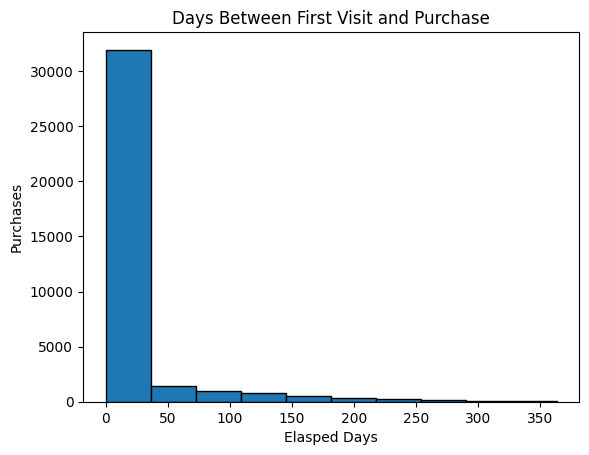

In [53]:
data = user_stats['diff_days']

plt.hist(data, bins=10, edgecolor='black')
plt.xlabel('Elasped Days')
plt.ylabel('Purchases')
plt.title('Days Between First Visit and Purchase')
plt.show()


In [54]:
# Customer conversion rate?:
print(' Conversion rate is: {:.1%}'.format(user_stats['Uid'].nunique()/visits['Uid'].nunique()))

 Conversion rate is: 16.0%


 Most visitors purchased something on their first visit for both 2017 and 2018 - conversion of 0.  If these two dates were to be separate out, please note that 2018 only shows the first 5 months of 2018; 2017 contains more data.  After their initial visit, users are less likely to return, more research needed on this to determine a reason.

### How many orders do they make during a given period of time?

This section of the analysis will use the orders df as the base for it's data. Working with first purchase date as the cohort. 


In [55]:

orders.head(2)

Buy Ts  Revenue                   Uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447

In [56]:
#using an alternate orders df so not to compromise data/codes using the orders df further into the project. 

orders_made = orders.sort_values(by=['Revenue'], ascending=False)
orders_made = orders_made.rename(columns={'Uid': 'uid'})
orders_made.head() 

Buy Ts  Revenue                   uid
23244 2017-12-10 20:17:00 2,633.28   5539673724080479777
36522 2018-02-23 08:54:00 1,236.28  11149926373378902217
36682 2018-02-24 09:25:00 1,221.37  11149926373378902217
23165 2017-12-10 13:04:00 1,195.64   5539673724080479777
24607 2017-12-17 18:06:00 1,109.10  11149926373378902217

In [57]:
orders_made['order_month'] = orders_made['Buy Ts'].astype('datetime64[M]')
orders_made.head(2)

Buy Ts  Revenue                   uid order_month
23244 2017-12-10 20:17:00 2,633.28   5539673724080479777  2017-12-01
36522 2018-02-23 08:54:00 1,236.28  11149926373378902217  2018-02-01

In [58]:
#Now let's retrieve the month of each customer's first purchase:
first_orders = orders_made.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head() 

uid first_order_month
0   313578113262317        2018-01-01
1  1575281904278712        2017-06-01
2  2429014661409475        2017-10-01
3  2464366381792757        2018-01-01
4  2551852515556206        2017-11-01

In [59]:
#merge the order and first order data frames based on 'user id'

fo_dates = orders_made.merge(first_orders,on=['uid']) 
fo_dates


Buy Ts  Revenue                   uid order_month  \
0     2017-12-10 20:17:00 2,633.28   5539673724080479777  2017-12-01   
1     2017-12-10 13:04:00 1,195.64   5539673724080479777  2017-12-01   
2     2017-12-15 21:22:00   604.39   5539673724080479777  2017-12-01   
3     2017-12-05 00:50:00   402.72   5539673724080479777  2017-12-01   
4     2017-12-08 12:25:00   360.55   5539673724080479777  2017-12-01   
...                   ...      ...                   ...         ...   
50410 2017-08-02 14:54:00     0.00    184148767273119549  2017-08-01   
50411 2018-05-26 12:12:00     0.00  14872085179275033073  2018-05-01   
50412 2017-11-28 20:58:00     0.00   2636645662067512510  2017-11-01   
50413 2017-12-04 22:08:00     0.00   6538135401269860305  2017-12-01   
50414 2017-11-30 20:24:00     0.00   9971607959588724150  2017-11-01   

      first_order_month  
0            2017-09-01  
1            2017-09-01  
2            2017-09-01  
3            2017-09-01  
4            2017-09-01  
...                 ...  
50410        2017-08-01  
50411        2018-05-01  
50412        2017-11-01  
50413        2017-12-01  
50414        2017-11-01  

[50415 rows x 5 columns]

In [60]:
#We'll calculate the (n_buyers) for each month:
focohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
focohort_sizes.columns = ['first_order_month', 'n_buyers']
focohort_sizes

first_order_month  n_buyers
0         2017-06-01      2023
1         2017-07-01      1923
2         2017-08-01      1370
3         2017-09-01      2581
4         2017-10-01      4340
5         2017-11-01      4081
6         2017-12-01      4383
7         2018-01-01      3373
8         2018-02-01      3651
9         2018-03-01      3533
10        2018-04-01      2276
11        2018-05-01      2988
12        2018-06-01         1

In [61]:
#group orders by first order month and order_month and count revenue

cohort_pur=fo_dates.groupby(['first_order_month','order_month'])['Revenue'].count().reset_index()
# renaming columns
cohort_pur.columns=['first_order_month','month','n_orders']
cohort_pur


first_order_month      month  n_orders
0         2017-06-01 2017-06-01      2354
1         2017-06-01 2017-07-01       177
2         2017-06-01 2017-08-01       174
3         2017-06-01 2017-09-01       226
4         2017-06-01 2017-10-01       292
..               ...        ...       ...
74        2018-03-01 2018-05-01       176
75        2018-04-01 2018-04-01      2495
76        2018-04-01 2018-05-01       195
77        2018-05-01 2018-05-01      3249
78        2018-06-01 2018-06-01         1

[79 rows x 3 columns]

In [62]:
#Merge the order and buyers cohorts

orders_cohort = pd.merge(focohort_sizes, cohort_pur, on='first_order_month')
orders_cohort


first_order_month  n_buyers      month  n_orders
0         2017-06-01      2023 2017-06-01      2354
1         2017-06-01      2023 2017-07-01       177
2         2017-06-01      2023 2017-08-01       174
3         2017-06-01      2023 2017-09-01       226
4         2017-06-01      2023 2017-10-01       292
..               ...       ...        ...       ...
74        2018-03-01      3533 2018-05-01       176
75        2018-04-01      2276 2018-04-01      2495
76        2018-04-01      2276 2018-05-01       195
77        2018-05-01      2988 2018-05-01      3249
78        2018-06-01         1 2018-06-01         1

[79 rows x 4 columns]

Now we have the cohorts combined into one dataframe. This will make it easier to determine cohort age and orders per buyer

In [63]:
#find cohort age

orders_cohort['age'] = (orders_cohort['month'] - orders_cohort['first_order_month']) / np.timedelta64(1, 'M')
orders_cohort['age'] = orders_cohort['age'].round().astype('int')

orders_cohort.head() 

first_order_month  n_buyers      month  n_orders  age
0        2017-06-01      2023 2017-06-01      2354    0
1        2017-06-01      2023 2017-07-01       177    1
2        2017-06-01      2023 2017-08-01       174    2
3        2017-06-01      2023 2017-09-01       226    3
4        2017-06-01      2023 2017-10-01       292    4

#### Buyers for each cohort

In [64]:
#buyers for each cohort
orders_cohort['orders_per_buyer'] = orders_cohort['n_orders']/orders_cohort['n_buyers']
orders_cohort.head()

first_order_month  n_buyers      month  n_orders  age  orders_per_buyer
0        2017-06-01      2023 2017-06-01      2354    0              1.16
1        2017-06-01      2023 2017-07-01       177    1              0.09
2        2017-06-01      2023 2017-08-01       174    2              0.09
3        2017-06-01      2023 2017-09-01       226    3              0.11
4        2017-06-01      2023 2017-10-01       292    4              0.14

In [65]:
# building pivot table to show the orders per buyer divided in ages by cohorts
cohort_optp_piv=orders_cohort.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='orders_per_buyer', 
    aggfunc='sum'
).cumsum(axis=1)

cohort_optp_piv.round(2).fillna('')

age                 0    1    2    3    4    5    6    7    8    9    10   11
first_order_month                                                            
2017-06-01        1.16 1.25 1.34 1.45 1.59 1.70 1.84 1.92 2.03 2.10 2.15 2.19
2017-07-01        1.14 1.19 1.25 1.31 1.34 1.39 1.42 1.44 1.47 1.49 1.51     
2017-08-01        1.12 1.20 1.27 1.33 1.39 1.44 1.47 1.53 1.56 1.60          
2017-09-01        1.14 1.22 1.28 1.35 1.37 1.42 1.46 1.48 1.50               
2017-10-01        1.14 1.22 1.25 1.28 1.31 1.34 1.35 1.38                    
2017-11-01        1.18 1.28 1.32 1.37 1.41 1.42 1.45                         
2017-12-01        1.15 1.21 1.26 1.30 1.32 1.34                              
2018-01-01        1.12 1.19 1.24 1.25 1.28                                   
2018-02-01        1.12 1.18 1.21 1.22                                        
2018-03-01        1.17 1.22 1.27                                             
2018-04-01        1.10 1.18                                                  
2018-05-01        1.09                                                       
2018-06-01        1.00

The time span for the number of orders is the first order month

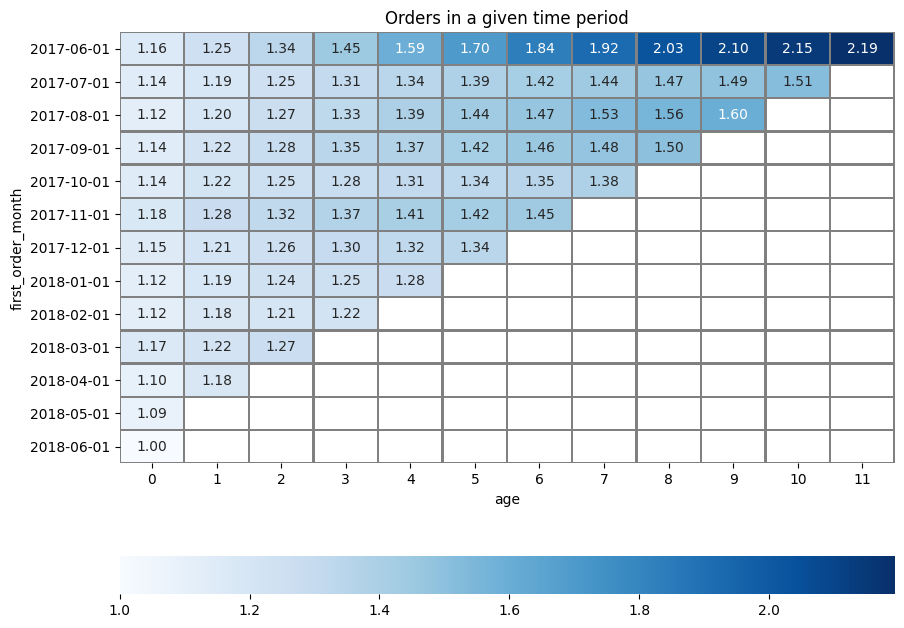

In [66]:
cohort_optp_piv.index=cohort_optp_piv.index.astype(str)
plt.figure(figsize=(10,8))
sns.heatmap(cohort_optp_piv, annot=True, linewidths=1, cmap='Blues', fmt='.2f', linecolor='grey', cbar_kws= {'orientation': 'horizontal'}, 
            ).set(title = 'Orders in a given time period')
plt.show()

<b>Insight:</b>  There are generally only one order per cohort age.  It isn't utnil age 4 that the number of orders starts to increase but that is relegated to June 2017.  August and September 2017 saw approximately 1.5 orders per cohort at age 6 and on. 

### What is the average purchase size?

In [67]:
overview.head(2)

Device              End Ts  Source Id            Start Ts  \
0  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
1  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   

                    Uid  year      month       week       date  \
0  16174680259334210214  2018 2018-05-01 2018-05-17 2018-05-20   
1  16174680259334210214  2018 2018-03-01 2018-03-08 2018-03-09   

   session_duration_sec visit_month cohort_month  cohort_index  \
0                  1440  2018-05-01   2018-03-01             2   
1                  1680  2018-03-01   2018-03-01             0   

               Buy Ts  Revenue    buy_date order_week order_month  \
0 2018-03-09 20:25:00     2.33  2018-03-09 2018-03-08  2018-03-01   
1 2018-03-09 20:25:00     2.33  2018-03-09 2018-03-08  2018-03-01   

  first_order_date  
0       2018-03-09  
1       2018-03-09

In [68]:
avg_pur = overview.groupby(['order_month']
).agg({'Revenue': 'mean'}).reset_index() 
avg_pur


order_month  Revenue
0   2017-06-01     5.73
1   2017-07-01     7.39
2   2017-08-01     5.90
3   2017-09-01    11.33
4   2017-10-01     9.34
5   2017-11-01     7.31
6   2017-12-01    14.26
7   2018-01-01     7.23
8   2018-02-01     7.31
9   2018-03-01    10.19
10  2018-04-01    11.01
11  2018-05-01     6.42
12  2018-06-01     3.42

In [69]:
fig = px.bar(avg_pur , x="order_month", y="Revenue", text="Revenue", title="Average Purchase Size")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')# adds the bar labels
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

<b>Insights:</b> From the above table, December has the largest Average purchase size.  This can be due to December being a busy holiday month.  Once again June for 2018 ranks the lowest as not much data was collected for that month.

In [70]:
print('The average purchase size is {:,}'.format(orders['Revenue'].mean().round(2)))

The average purchase size is 5.0


### How much money do they bring? (LTV)

In [71]:
orders = orders.rename(columns={'Uid': 'uid'})
orders.head() 


Buy Ts  Revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450

In [72]:
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')

#Let's capture the months from the dates in the tables of orders and costs:

In [73]:
#Now let's retrieve the month of each customer's first purchase:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head() 


uid first_order_month
0   313578113262317        2018-01-01
1  1575281904278712        2017-06-01
2  2429014661409475        2017-10-01
3  2464366381792757        2018-01-01
4  2551852515556206        2017-11-01

In [74]:
#We'll calculate the number of new customers (n_buyers) for each month:
ltv_cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
ltv_cohort_sizes.columns = ['first_order_month', 'n_buyers']
ltv_cohort_sizes

first_order_month  n_buyers
0         2017-06-01      2023
1         2017-07-01      1923
2         2017-08-01      1370
3         2017-09-01      2581
4         2017-10-01      4340
5         2017-11-01      4081
6         2017-12-01      4383
7         2018-01-01      3373
8         2018-02-01      3651
9         2018-03-01      3533
10        2018-04-01      2276
11        2018-05-01      2988
12        2018-06-01         1

In [75]:
orders_ = pd.merge(orders,first_orders, on='uid')
orders_.head() 

Buy Ts  Revenue                   uid order_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   

  first_order_month  
0        2017-06-01  
1        2017-06-01  
2        2017-06-01  
3        2017-06-01  
4        2017-06-01

In [76]:
#Now we'll group the table of orders by month of first purchase and month of purchase and sum up the revenue. 
#We'll set the index to the default using the reset_index() method:

cohorts_grp = orders_.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
cohorts_grp

first_order_month order_month   Revenue
0         2017-06-01  2017-06-01  9,557.49
1         2017-06-01  2017-07-01    981.82
2         2017-06-01  2017-08-01    885.34
3         2017-06-01  2017-09-01  1,931.30
4         2017-06-01  2017-10-01  2,068.58
..               ...         ...       ...
74        2018-03-01  2018-05-01  1,114.87
75        2018-04-01  2018-04-01 10,600.69
76        2018-04-01  2018-05-01  1,209.92
77        2018-05-01  2018-05-01 13,925.76
78        2018-06-01  2018-06-01      3.42

[79 rows x 3 columns]

In [77]:
# Let's add data on how many users made their first purchases in each month to the cohorts table:

report1 = pd.merge(ltv_cohort_sizes, cohorts_grp, on='first_order_month')
report1

first_order_month  n_buyers order_month   Revenue
0         2017-06-01      2023  2017-06-01  9,557.49
1         2017-06-01      2023  2017-07-01    981.82
2         2017-06-01      2023  2017-08-01    885.34
3         2017-06-01      2023  2017-09-01  1,931.30
4         2017-06-01      2023  2017-10-01  2,068.58
..               ...       ...         ...       ...
74        2018-03-01      3533  2018-05-01  1,114.87
75        2018-04-01      2276  2018-04-01 10,600.69
76        2018-04-01      2276  2018-05-01  1,209.92
77        2018-05-01      2988  2018-05-01 13,925.76
78        2018-06-01         1  2018-06-01      3.42

[79 rows x 4 columns]

The first five values in this column are the same, since they all concern the same cohort.

In [78]:
#no margin rate given.
#now to find cohort age

report1['age'] = (report1['order_month'] - report1['first_order_month']) / np.timedelta64(1, 'M')
report1['age'] = report1['age'].round().astype('int')

report1.head() 

first_order_month  n_buyers order_month  Revenue  age
0        2017-06-01      2023  2017-06-01 9,557.49    0
1        2017-06-01      2023  2017-07-01   981.82    1
2        2017-06-01      2023  2017-08-01   885.34    2
3        2017-06-01      2023  2017-09-01 1,931.30    3
4        2017-06-01      2023  2017-10-01 2,068.58    4

In [79]:
#determine LTV
report1['ltv'] = report1['Revenue'] / report1['n_buyers']

report1.head()

first_order_month  n_buyers order_month  Revenue  age  ltv
0        2017-06-01      2023  2017-06-01 9,557.49    0 4.72
1        2017-06-01      2023  2017-07-01   981.82    1 0.49
2        2017-06-01      2023  2017-08-01   885.34    2 0.44
3        2017-06-01      2023  2017-09-01 1,931.30    3 0.95
4        2017-06-01      2023  2017-10-01 2,068.58    4 1.02

In [80]:
report1_piv=report1.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)# cumulative value

report1_piv.fillna('')


age                 0    1    2     3     4     5     6     7     8     9   \
first_order_month                                                            
2017-06-01        4.72 5.21 5.65  6.60  7.62  8.36  9.31  9.89 10.45 11.05   
2017-07-01        6.01 6.35 6.97  7.33  7.50  7.66  7.78  7.92  8.08  8.23   
2017-08-01        5.28 5.75 6.21  6.60  7.09  7.38  7.59  7.99  8.28  8.47   
2017-09-01        5.64 6.76 7.28 11.26 11.66 12.31 13.01 13.25 13.44         
2017-10-01        5.00 5.54 5.73  5.89  6.04  6.16  6.24  6.36               
2017-11-01        5.15 5.55 5.75  6.08  6.23  6.28  6.40                     
2017-12-01        4.74 5.00 5.92  6.99  7.30  7.64                           
2018-01-01        4.14 4.43 4.73  4.88  4.94                                 
2018-02-01        4.16 4.44 4.51  4.59                                       
2018-03-01        4.84 5.14 5.46                                             
2018-04-01        4.66 5.19                                                  
2018-05-01        4.66                                                       
2018-06-01        3.42                                                       

age                  10    11  
first_order_month              
2017-06-01        11.62 11.88  
2017-07-01         8.39        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01                     
2018-06-01

The LTV value shown in the "report1" dataframe is not the cummulative value of LTV.  That is done in creating the pivot table; the value adds upon itself as it ages. 

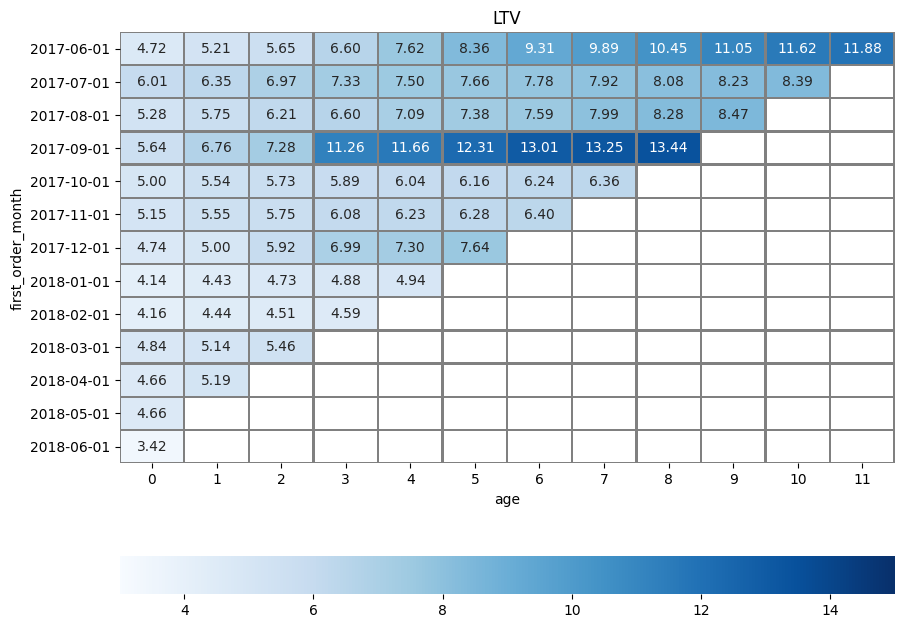

In [81]:
#heatmap
report1_piv.index=report1_piv.index.astype(str)
plt.figure(figsize=(10,8))
sns.heatmap(report1_piv, annot=True, linewidths=1, cmap='Blues', linecolor='grey', fmt='.2f', vmax=15, vmin=3, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'LTV')
plt.show()


<b>Insight</b> The June 2017 cohort had the longest duration of LTV (up to age 11), thus, contributed the longest time. However, the September 2017 cohort had the highest LTV for it's entire duration. May and June 2018 had the lowest.  More information is needed to see what spurred and dampened user purchases. 

# Marketing
1. How much money was spent? Overall, per source and over time.
2. How much did customer acquisition from each of the sources cost?
3. How worthwhile where the investments? (ROI)

### 1. How much money was spent? Overall, per source and over time.

In [82]:
costs.head()

source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08

In [83]:
# capture the months from the dates in the costs table
costs['first_order_month'] = costs['dt'].astype('datetime64[M]') 


In [84]:
#sorting cost for futher analysis
costs_srt = costs.sort_values(by=['dt','source_id'])
costs_srt.head(10)

source_id         dt  costs first_order_month
0             1 2017-06-01  75.20        2017-06-01
363           2 2017-06-01 132.56        2017-06-01
726           3 2017-06-01 349.38        2017-06-01
1089          4 2017-06-01  76.74        2017-06-01
1452          5 2017-06-01  73.24        2017-06-01
1816          9 2017-06-01  13.06        2017-06-01
2179         10 2017-06-01  15.08        2017-06-01
1             1 2017-06-02  62.25        2017-06-01
364           2 2017-06-02 132.38        2017-06-01
727           3 2017-06-02 314.22        2017-06-01

In [85]:
#How much spent overall?
print('Total ad expenses $ {:,}'.format(costs['costs'].sum()))


Total ad expenses $ 329,131.62


In [86]:
#How much spent by source?
expen_source = costs_srt.groupby(['source_id'])['costs'].sum().reset_index()
pd.options.display.float_format = '{:,.2f}'.format #format number to have commas
expen_source.head(15)

source_id      costs
0          1  20,833.27
1          2  42,806.04
2          3 141,321.63
3          4  61,073.60
4          5  51,757.10
5          9   5,517.49
6         10   5,822.49

The source with the highest marketing expense is Source 3 followed by Sources 4 & 5. It would be nice to know what each source exactually is.

In [87]:
# What are the Source ID's that we had from the original 'costs' table?
source_ids = costs['source_id'].unique()

# Print or display unique source IDs
print("Unique Source IDs:")
print(source_ids)

Unique Source IDs:
[ 1  2  3  4  5  9 10]


In [88]:
#How much spent by month?
expen_mo = costs_srt.groupby(['first_order_month'])['costs'].sum().reset_index()
pd.options.display.float_format = '{:,.2f}'.format #format number to have commas
expen_mo.head(15)

first_order_month     costs
0         2017-06-01 18,015.00
1         2017-07-01 18,240.59
2         2017-08-01 14,790.54
3         2017-09-01 24,368.91
4         2017-10-01 36,322.88
5         2017-11-01 37,907.88
6         2017-12-01 38,315.35
7         2018-01-01 33,518.52
8         2018-02-01 32,723.03
9         2018-03-01 30,415.27
10        2018-04-01 22,289.38
11        2018-05-01 22,224.27

In [89]:
fig = px.bar(expen_mo , x="first_order_month", y="costs", text="costs", title="Marketing Expense by Month")
fig.update_traces(texttemplate='%{text:.4s}', textposition='outside')# adds the bar labels, .4s is how many digits are shown
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

The monthly marketing expense shows a natural progression for the time period. 6 of the months the marketing expense is below $25k. November and December has the highest marketing expense which could be due to the holiday season. All businesses are trying to cash in on holiday shopping dollars so it makes sense that more of an effort is put forth during that time. 

In [90]:
costs_srt.head()

source_id         dt  costs first_order_month
0             1 2017-06-01  75.20        2017-06-01
363           2 2017-06-01 132.56        2017-06-01
726           3 2017-06-01 349.38        2017-06-01
1089          4 2017-06-01  76.74        2017-06-01
1452          5 2017-06-01  73.24        2017-06-01

In [91]:
# AD EXPENSE BY SOURCE
expen_source = costs_srt.groupby(['source_id', 'first_order_month'])['costs'].sum().reset_index()
pd.options.display.float_format = '{:,.2f}'.format #format number to have commas
expen_source.head()

source_id first_order_month    costs
0          1        2017-06-01 1,125.61
1          1        2017-07-01 1,072.88
2          1        2017-08-01   951.81
3          1        2017-09-01 1,502.01
4          1        2017-10-01 2,315.75

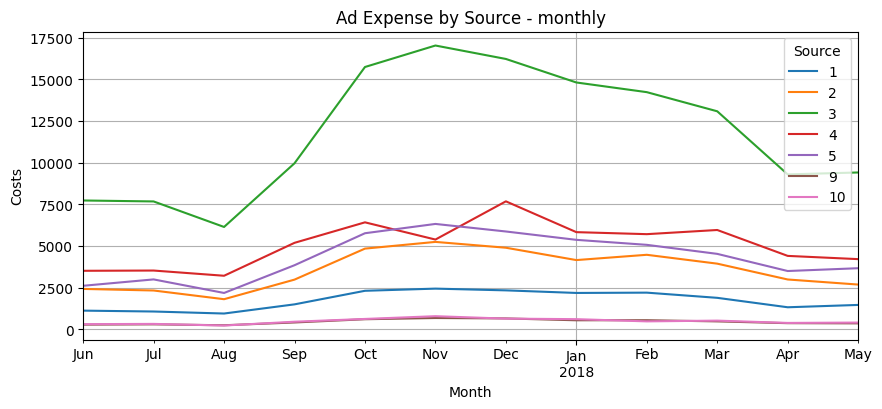

In [92]:
# Ad Expense vs Source Plotting
tbl_data = expen_source.pivot(index='first_order_month', columns='source_id', values='costs')

# Plotting with Matplotlib
fig, ax = plt.subplots(figsize=(10, 4))

tbl_data.plot(kind='line', ax=ax)

# Customize the plot
ax.set_title('Ad Expense by Source - monthly')
ax.set_xlabel('Month')
ax.set_ylabel('Costs')
ax.legend(title='Source')
ax.grid(True)

# Show the plot
plt.show()

In [93]:
rev_source2.head(15)

Source Id      Revenue
0          1 2,298,200.17
1          2 2,638,189.21
2          3   296,687.96
3          4   496,690.17
4          5 1,181,477.14
5          7         1.22
6          9    36,342.25
7         10    14,619.23

<b>Insights:</b>  Source three has the highest marketing expense. If we compare the source with the highest expense and those with the highest Revenue; Source 3 is lacking on it's return. The highest Revenue sources also have marketing expenses, on average of less than $6k on average per month.  

<b> Recommendation:</b>  Marketing department should re-evaluate the benefit of using Source 3 as an advertising source. Source 7 had virtually no activity at all so it didn't register and should be dropped along with Sources 10 and 9 due to low performance.

### 2. How much did customer acquisition from each of the sources cost?

### CAC by Buyers

In [94]:
costs

source_id         dt  costs first_order_month
0             1 2017-06-01  75.20        2017-06-01
1             1 2017-06-02  62.25        2017-06-01
2             1 2017-06-03  36.53        2017-06-01
3             1 2017-06-04  55.00        2017-06-01
4             1 2017-06-05  57.08        2017-06-01
...         ...        ...    ...               ...
2537         10 2018-05-27   9.92        2018-05-01
2538         10 2018-05-28  21.26        2018-05-01
2539         10 2018-05-29  11.32        2018-05-01
2540         10 2018-05-30  33.15        2018-05-01
2541         10 2018-05-31  17.60        2018-05-01

[2542 rows x 4 columns]

In [95]:
# Costs by month
#Customers will be taken from the buyer table and not from the visits table since we 
#are working with customers and not visitors. 

costs_by_month = costs.groupby(['first_order_month'])['costs'].sum().reset_index()
costs_by_month.head()


first_order_month     costs
0        2017-06-01 18,015.00
1        2017-07-01 18,240.59
2        2017-08-01 14,790.54
3        2017-09-01 24,368.91
4        2017-10-01 36,322.88

In [96]:
#frist order month
overview['first_order_month'] = overview['first_order_date'].astype('datetime64[M]')
overview.head(2)

Device              End Ts  Source Id            Start Ts  \
0  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
1  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   

                    Uid  year      month       week       date  \
0  16174680259334210214  2018 2018-05-01 2018-05-17 2018-05-20   
1  16174680259334210214  2018 2018-03-01 2018-03-08 2018-03-09   

   session_duration_sec visit_month cohort_month  cohort_index  \
0                  1440  2018-05-01   2018-03-01             2   
1                  1680  2018-03-01   2018-03-01             0   

               Buy Ts  Revenue    buy_date order_week order_month  \
0 2018-03-09 20:25:00     2.33  2018-03-09 2018-03-08  2018-03-01   
1 2018-03-09 20:25:00     2.33  2018-03-09 2018-03-08  2018-03-01   

  first_order_date first_order_month  
0       2018-03-09        2018-03-01  
1       2018-03-09        2018-03-01

In [97]:
overview.head(2) #every column from Buy Ts on was done on the orders df

Device              End Ts  Source Id            Start Ts  \
0  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
1  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   

                    Uid  year      month       week       date  \
0  16174680259334210214  2018 2018-05-01 2018-05-17 2018-05-20   
1  16174680259334210214  2018 2018-03-01 2018-03-08 2018-03-09   

   session_duration_sec visit_month cohort_month  cohort_index  \
0                  1440  2018-05-01   2018-03-01             2   
1                  1680  2018-03-01   2018-03-01             0   

               Buy Ts  Revenue    buy_date order_week order_month  \
0 2018-03-09 20:25:00     2.33  2018-03-09 2018-03-08  2018-03-01   
1 2018-03-09 20:25:00     2.33  2018-03-09 2018-03-08  2018-03-01   

  first_order_date first_order_month  
0       2018-03-09        2018-03-01  
1       2018-03-09        2018-03-01

In [98]:
# Buyers by month
#first order date for orders - to avoid confusion, this will be done separate from previously created dfs
#let's find the date of the first order for each user. Using the overview table(combined data)

buyers_by_month = overview.groupby(['order_month'])['Uid'].nunique().reset_index()
buyers_by_month.columns=['first_order_month','buyers']
buyers_by_month.head()

first_order_month  buyers
0        2017-06-01    2023
1        2017-07-01    1984
2        2017-08-01    1472
3        2017-09-01    2750
4        2017-10-01    4675

In [99]:
CAC_per_month = costs_by_month.merge(buyers_by_month, how='left', on = ['first_order_month'])
CAC_per_month['CAC'] = CAC_per_month['costs']/CAC_per_month['buyers']
CAC_per_month.head(20)
# Cost month is the first order month from the overviewdf based on buyer date

first_order_month     costs  buyers   CAC
0         2017-06-01 18,015.00    2023  8.91
1         2017-07-01 18,240.59    1984  9.19
2         2017-08-01 14,790.54    1472 10.05
3         2017-09-01 24,368.91    2750  8.86
4         2017-10-01 36,322.88    4675  7.77
5         2017-11-01 37,907.88    4547  8.34
6         2017-12-01 38,315.35    4942  7.75
7         2018-01-01 33,518.52    3898  8.60
8         2018-02-01 32,723.03    4258  7.69
9         2018-03-01 30,415.27    4181  7.27
10        2018-04-01 22,289.38    2744  8.12
11        2018-05-01 22,224.27    3544  6.27

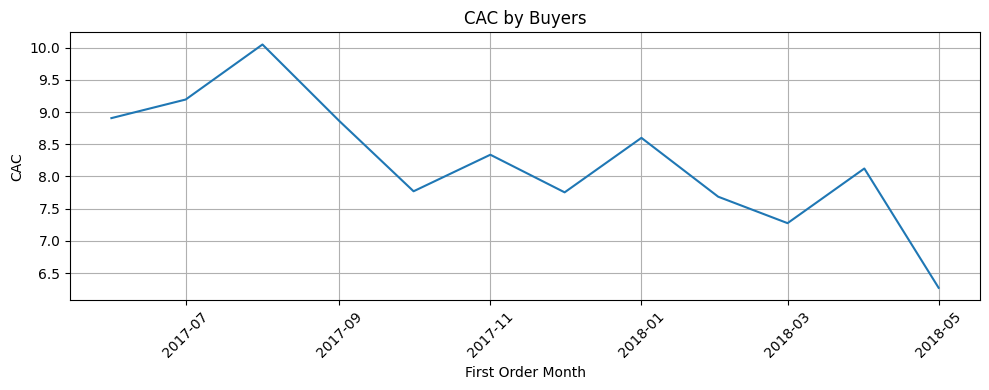

In [100]:
#Now to plot CAC
first_order_month = CAC_per_month['first_order_month']
CAC = CAC_per_month['CAC']

plt.figure(figsize=(10, 4))
plt.plot(first_order_month, CAC)
plt.title('CAC by Buyers')
plt.xlabel('First Order Month')
plt.ylabel('CAC')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [101]:
#to determine average CAC

print('The average CAC is $ {:,}'.format(CAC_per_month['CAC'].mean().round(2)))

The average CAC is $ 8.24


### CAC by Source

For CAC by source we should:

1. Find the day and month of the first purchase of each customer
2. Sort visits by first date and group by first uid.
3. Merge with first orders
4. Group table by source_id and first day, count uid
5. Add costs using left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt']
6. Calculate CAC, create pivot table and plot a graph.

In [102]:
visits.head(2)

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   

                    Uid  year      month       week        date  \
0  16879256277535980062  2017 2017-12-01 2017-12-14  2017-12-20   
1    104060357244891740  2018 2018-02-01 2018-02-15  2018-02-19   

   session_duration_sec visit_month cohort_month  cohort_index  
0                  1080  2017-12-01   2017-12-01             0  
1                  1680  2018-02-01   2018-02-01             0

In [103]:
visits.groupby(['Uid'])['Source Id'].nunique().head()

Uid
11863502262781     1
49537067089222     1
297729379853735    1
313578113262317    1
325320750514679    1
Name: Source Id, dtype: int64

In [104]:
#first source
first_source=visits.sort_values('date').groupby('Uid').first()['Source Id'].reset_index()
first_source.columns=['uid','first_source']
first_source.head()

uid  first_source
0   11863502262781             3
1   49537067089222             2
2  297729379853735             3
3  313578113262317             2
4  325320750514679             5

In [105]:
orders_.head()

Buy Ts  Revenue                   uid order_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   

  first_order_month  
0        2017-06-01  
1        2017-06-01  
2        2017-06-01  
3        2017-06-01  
4        2017-06-01

In [106]:
#Merge this data back to purchase because CAC calculations are based on buyers

fsrce_grp = orders_.merge(first_source,on=['uid'],how='left')
fsrce_grp.head()

Buy Ts  Revenue                   uid order_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   

  first_order_month  first_source  
0        2017-06-01             1  
1        2017-06-01             2  
2        2017-06-01             2  
3        2017-06-01             2  
4        2017-06-01             3

In [107]:
costs_srt.head(2)

source_id         dt  costs first_order_month
0            1 2017-06-01  75.20        2017-06-01
363          2 2017-06-01 132.56        2017-06-01

In [108]:
marketing_by_month_source = costs_srt.groupby(['first_order_month','source_id'])['costs'].sum().reset_index()
marketing_by_month_source.head()

first_order_month  source_id    costs
0        2017-06-01          1 1,125.61
1        2017-06-01          2 2,427.38
2        2017-06-01          3 7,731.65
3        2017-06-01          4 3,514.80
4        2017-06-01          5 2,616.12

In [109]:
buyers_per_month_source = fsrce_grp.groupby(['first_order_month','first_source'])['uid'].nunique().reset_index()
buyers_per_month_source.columns=['cost_month','source','buyers']
buyers_per_month_source.head()

cost_month  source  buyers
0 2017-06-01       1     213
1 2017-06-01       2     241
2 2017-06-01       3     616
3 2017-06-01       4     405
4 2017-06-01       5     389

In [110]:
#actual cac calculations

CAC_per_month_source = marketing_by_month_source.merge(buyers_per_month_source,
                                   left_on=['source_id', 'first_order_month'],
                                   right_on=['source', 'cost_month']
                                  )

CAC_per_month_source.head()


CAC_per_month_source['CAC']=CAC_per_month_source['costs']/CAC_per_month_source['buyers']
CAC_per_month_source.head()


first_order_month  source_id    costs cost_month  source  buyers   CAC
0        2017-06-01          1 1,125.61 2017-06-01       1     213  5.28
1        2017-06-01          2 2,427.38 2017-06-01       2     241 10.07
2        2017-06-01          3 7,731.65 2017-06-01       3     616 12.55
3        2017-06-01          4 3,514.80 2017-06-01       4     405  8.68
4        2017-06-01          5 2,616.12 2017-06-01       5     389  6.73

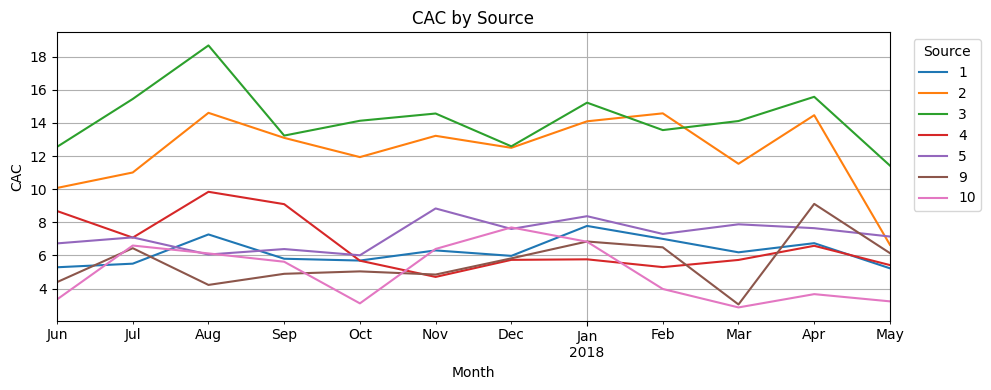

In [111]:
# Pivot the data to plot each source as a separate line
cacdata = CAC_per_month_source.pivot(index='cost_month', columns='source_id', values='CAC')

# Plotting with Matplotlib
fig, ax = plt.subplots(figsize=(10, 4))

cacdata.plot(kind='line', ax=ax)

# Customize the plot
ax.set_title('CAC by Source')
ax.set_xlabel('Month')
ax.set_ylabel('CAC')

# Make sure legend outside the plot area (previously was in the middle of chart)
ax.legend(title='Source', loc='upper left', bbox_to_anchor=(1.02, 1))

ax.grid(True)

# Show the plot
plt.tight_layout()  # Ensures the plot elements fit nicely
plt.show()

In [112]:
rev_source2.head(15)

Source Id      Revenue
0          1 2,298,200.17
1          2 2,638,189.21
2          3   296,687.96
3          4   496,690.17
4          5 1,181,477.14
5          7         1.22
6          9    36,342.25
7         10    14,619.23

<b> Insight:</b> The source with the highest cost is 3 at 141K; interestinly, source 3 ranks 5 amongst the platforms in terms of Revenue. Source 7 didn't even register due to it's low value. Sources 1, 2 and 5 are the top performing sources and should be focued on. The average cost for marketing for each of the top sources is 38K with Source 5 having the highest individual ad cost of 52K. 

<b>Recommendations:</b> Under-performing should be given thought of termination or replacement

## 3. How worthwhile where the investments? (ROI)

### ROI by Cohort

In [113]:
#We will start with ROI per cohort.
#In genereal, ROI=LTV/CAC
#We already have calculations on CAC per month and we have info on ltv in ltv_cohort. So let's merge and work it out!

CAC_per_month.head()

first_order_month     costs  buyers   CAC
0        2017-06-01 18,015.00    2023  8.91
1        2017-07-01 18,240.59    1984  9.19
2        2017-08-01 14,790.54    1472 10.05
3        2017-09-01 24,368.91    2750  8.86
4        2017-10-01 36,322.88    4675  7.77

In [114]:
CAC_per_month_ROI=CAC_per_month[['first_order_month','CAC']]#selects columns from df

CAC_per_month_ROI.head()

first_order_month   CAC
0        2017-06-01  8.91
1        2017-07-01  9.19
2        2017-08-01 10.05
3        2017-09-01  8.86
4        2017-10-01  7.77

In [115]:
report1.head()

first_order_month  n_buyers order_month  Revenue  age  ltv
0        2017-06-01      2023  2017-06-01 9,557.49    0 4.72
1        2017-06-01      2023  2017-07-01   981.82    1 0.49
2        2017-06-01      2023  2017-08-01   885.34    2 0.44
3        2017-06-01      2023  2017-09-01 1,931.30    3 0.95
4        2017-06-01      2023  2017-10-01 2,068.58    4 1.02

In [116]:
ROI=report1.merge(CAC_per_month_ROI,on=['first_order_month'],how='left')
ROI.head()

first_order_month  n_buyers order_month  Revenue  age  ltv  CAC
0        2017-06-01      2023  2017-06-01 9,557.49    0 4.72 8.91
1        2017-06-01      2023  2017-07-01   981.82    1 0.49 8.91
2        2017-06-01      2023  2017-08-01   885.34    2 0.44 8.91
3        2017-06-01      2023  2017-09-01 1,931.30    3 0.95 8.91
4        2017-06-01      2023  2017-10-01 2,068.58    4 1.02 8.91

In [117]:
ROI['ROI']=ROI['ltv']/ROI['CAC']

ROI.head()

first_order_month  n_buyers order_month  Revenue  age  ltv  CAC  ROI
0        2017-06-01      2023  2017-06-01 9,557.49    0 4.72 8.91 0.53
1        2017-06-01      2023  2017-07-01   981.82    1 0.49 8.91 0.05
2        2017-06-01      2023  2017-08-01   885.34    2 0.44 8.91 0.05
3        2017-06-01      2023  2017-09-01 1,931.30    3 0.95 8.91 0.11
4        2017-06-01      2023  2017-10-01 2,068.58    4 1.02 8.91 0.11

In [118]:
roi_piv = ROI.pivot_table(
    index='first_order_month', columns='age', values='ROI', aggfunc='mean'
).cumsum(axis=1)

roi_piv

age                 0    1    2    3    4    5    6    7    8    9    10   11
first_order_month                                                            
2017-06-01        0.53 0.59 0.63 0.74 0.86 0.94 1.05 1.11 1.17 1.24 1.31 1.33
2017-07-01        0.65 0.69 0.76 0.80 0.82 0.83 0.85 0.86 0.88 0.90 0.91  NaN
2017-08-01        0.53 0.57 0.62 0.66 0.71 0.73 0.76 0.80 0.82 0.84  NaN  NaN
2017-09-01        0.64 0.76 0.82 1.27 1.32 1.39 1.47 1.50 1.52  NaN  NaN  NaN
2017-10-01        0.64 0.71 0.74 0.76 0.78 0.79 0.80 0.82  NaN  NaN  NaN  NaN
2017-11-01        0.62 0.67 0.69 0.73 0.75 0.75 0.77  NaN  NaN  NaN  NaN  NaN
2017-12-01        0.61 0.64 0.76 0.90 0.94 0.99  NaN  NaN  NaN  NaN  NaN  NaN
2018-01-01        0.48 0.52 0.55 0.57 0.57  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2018-02-01        0.54 0.58 0.59 0.60  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2018-03-01        0.67 0.71 0.75  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2018-04-01        0.57 0.64  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2018-05-01        0.74  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

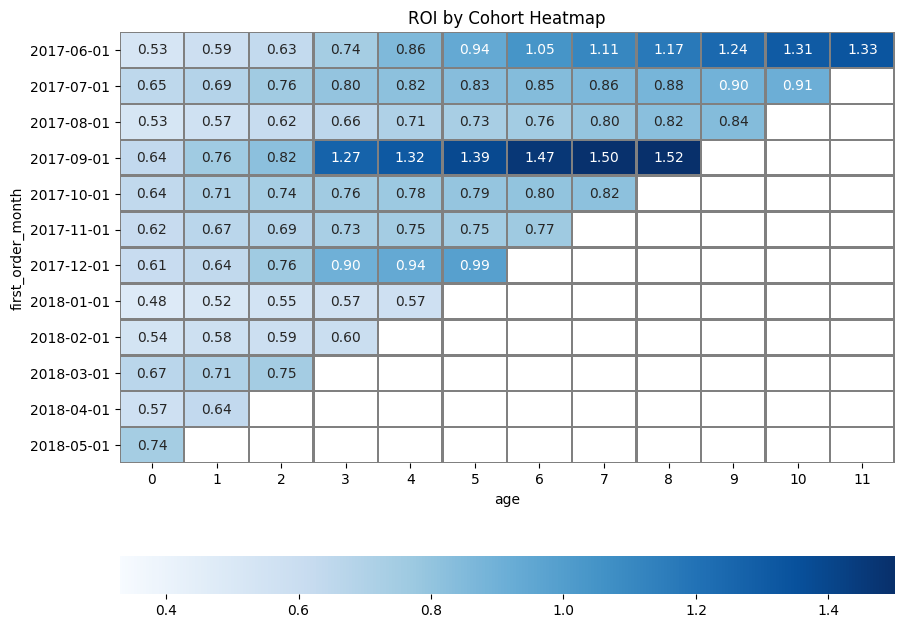

In [119]:
#heatmap
roi_piv.index=roi_piv.index.astype(str)
plt.figure(figsize=(10,8))
sns.heatmap(roi_piv, annot=True, linewidths=1, cmap='Blues', linecolor='grey', fmt='.2f', vmax=1.5, vmin=.33, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'ROI by Cohort Heatmap')
plt.show()

The best month as far as ROI is concerned is September of 2017 followed by our first month of June 2017.  From the above cohort analysis, ROI did increase over the lifetime but by small amounts. A few of the cohorts had a nice little jump of .12 %

### ROI by Source

#### Now to determine the LTV per Source

In [120]:
fsrce_grp.head() #df where first Source was found. This will be used for ltv per source

Buy Ts  Revenue                   uid order_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   

  first_order_month  first_source  
0        2017-06-01             1  
1        2017-06-01             2  
2        2017-06-01             2  
3        2017-06-01             2  
4        2017-06-01             3

In [121]:
ltv_per_source=fsrce_grp.groupby(['first_source'])['uid','Revenue'].agg({'uid':'nunique','Revenue':'sum'}).reset_index()
ltv_per_source.columns=['source','buyers','revenue']#renaming fsrce_grp columns
ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['buyers'] #finds ltv based on source
#ltv_per_source = ltv_per_source.drop(ltv_per_source[ltv_per_source['source'] == 7].index)#dropping 7 since only 1 (@ 1.22)
ltv_per_source


source  buyers   revenue   ltv
0       1    3365 34,797.27 10.34
1       2    3556 45,335.95 12.75
2       3   10137 51,958.06  5.13
3       4    9999 55,387.40  5.54
4       5    7109 54,442.14  7.66
5       7       1      1.22  1.22
6       9    1054  5,538.50  5.25
7      10    1302  4,596.66  3.53

In [122]:
ltv_per_source=fsrce_grp.groupby(['first_source'])['uid','Revenue'].agg({'uid':'nunique','Revenue':'sum'}).reset_index()
ltv_per_source.columns=['source','buyers','revenue']#renaming fsrce_grp columns
ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['buyers'] #finds ltv based on source
#ltv_per_source = ltv_per_source.drop(ltv_per_source[ltv_per_source['source'] == 7].index)#dropping 7 since only 1 (@ 1.22)
ltv_per_source


source  buyers   revenue   ltv
0       1    3365 34,797.27 10.34
1       2    3556 45,335.95 12.75
2       3   10137 51,958.06  5.13
3       4    9999 55,387.40  5.54
4       5    7109 54,442.14  7.66
5       7       1      1.22  1.22
6       9    1054  5,538.50  5.25
7      10    1302  4,596.66  3.53

Source 7 at least registered with only one user and 1.22 in revenue. 

#### This will determine the CAC per Source

In [123]:
#Lets start fresh to find CAC by source
marketing_by_month_source.head() #df preview; this will get the costs per source

first_order_month  source_id    costs
0        2017-06-01          1 1,125.61
1        2017-06-01          2 2,427.38
2        2017-06-01          3 7,731.65
3        2017-06-01          4 3,514.80
4        2017-06-01          5 2,616.12

In [124]:
fsrce_grp.head(2) #This df will allow us to get the buyers by source for CAC calculation

Buy Ts  Revenue                   uid order_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   

  first_order_month  first_source  
0        2017-06-01             1  
1        2017-06-01             2

In [125]:
#CAC buyers
cps =fsrce_grp.groupby(['first_source'])['uid'].nunique().reset_index()
cps.columns = ['source', 'buyers']
#cps = cps.drop(cps[cps['source'] == 7].index)
cps

source  buyers
0       1    3365
1       2    3556
2       3   10137
3       4    9999
4       5    7109
5       7       1
6       9    1054
7      10    1302

In [126]:
#CAC costs
src_cac_costs = marketing_by_month_source.groupby(['source_id'])['costs'].sum().reset_index()
src_cac_costs.columns = ['source', 'costs']
src_cac_costs

source      costs
0       1  20,833.27
1       2  42,806.04
2       3 141,321.63
3       4  61,073.60
4       5  51,757.10
5       9   5,517.49
6      10   5,822.49

Yes, Source 7 is not shown. This could be due to a couple of factors; only one buyer, a revenue of 1.22 and having no cost value logged

In [127]:
cac_for_roi = cps.merge(src_cac_costs,on=['source'],how='left') #merge dfs to start calculations
cac_for_roi

source  buyers      costs
0       1    3365  20,833.27
1       2    3556  42,806.04
2       3   10137 141,321.63
3       4    9999  61,073.60
4       5    7109  51,757.10
5       7       1        NaN
6       9    1054   5,517.49
7      10    1302   5,822.49

In [128]:
#determining CAC for each source
cac_for_roi['cac'] = cac_for_roi['costs']/ltv_per_source['buyers'] #finds ltv based on source
cac_for_roi

source  buyers      costs   cac
0       1    3365  20,833.27  6.19
1       2    3556  42,806.04 12.04
2       3   10137 141,321.63 13.94
3       4    9999  61,073.60  6.11
4       5    7109  51,757.10  7.28
5       7       1        NaN   NaN
6       9    1054   5,517.49  5.23
7      10    1302   5,822.49  4.47

In [129]:
roi_tlv_cac = cac_for_roi.merge(ltv_per_source,on=['source'],how='left')
roi_tlv_cac = roi_tlv_cac.drop('buyers_y', axis=1)
roi_tlv_cac

source  buyers_x      costs   cac   revenue   ltv
0       1      3365  20,833.27  6.19 34,797.27 10.34
1       2      3556  42,806.04 12.04 45,335.95 12.75
2       3     10137 141,321.63 13.94 51,958.06  5.13
3       4      9999  61,073.60  6.11 55,387.40  5.54
4       5      7109  51,757.10  7.28 54,442.14  7.66
5       7         1        NaN   NaN      1.22  1.22
6       9      1054   5,517.49  5.23  5,538.50  5.25
7      10      1302   5,822.49  4.47  4,596.66  3.53

In [130]:
#find romi
roi_tlv_cac['romi']=roi_tlv_cac['ltv']/roi_tlv_cac['cac']
roi_tlv_cac

source  buyers_x      costs   cac   revenue   ltv  romi
0       1      3365  20,833.27  6.19 34,797.27 10.34  1.67
1       2      3556  42,806.04 12.04 45,335.95 12.75  1.06
2       3     10137 141,321.63 13.94 51,958.06  5.13  0.37
3       4      9999  61,073.60  6.11 55,387.40  5.54  0.91
4       5      7109  51,757.10  7.28 54,442.14  7.66  1.05
5       7         1        NaN   NaN      1.22  1.22   NaN
6       9      1054   5,517.49  5.23  5,538.50  5.25  1.00
7      10      1302   5,822.49  4.47  4,596.66  3.53  0.79

posx and posy should be finite values
posx and posy should be finite values


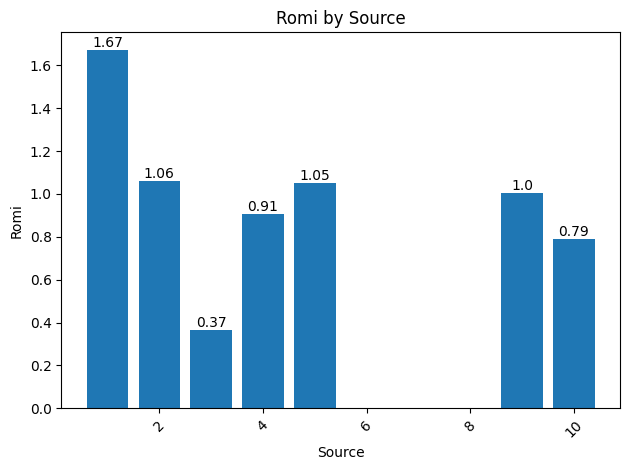

In [131]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plotting the bars
bars = ax.bar(roi_tlv_cac['source'], roi_tlv_cac['romi'])

# Adding labels to the top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Setting labels and title
ax.set_xlabel('Source')
ax.set_ylabel('Romi')
ax.set_title('Romi by Source')

# Display the plot
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability if needed
plt.tight_layout()  # Ensures labels are not cut off
plt.show()

<b> Source Note:</b>  <i>Originally there were no Source 6 or 8 and Source 7 was so neglible that it's ROMI was 0.  This is why there is a gap from Source 5-9.</i>

<b> Insights:</b>There is no ROI/ROMI for Source 7 as it value was practically negligible, it didn't register enough for a cost value even with 1 users.  That one user only generated 1.22 in revenue for Source 7 so curious to what item was purchased by the user.  As other analysis has shown. Other than the top source, Source 1, the others maintained a fairly average ROI/ROMI regardless of marketing costs

<b>Recommendation:</b> It's advisable to reallocate the marketing budget to the source that costs lower but could yield higher ROMI in a shorter period. Source 3 is not a profitable source(along with Source 7) and although Sources 9 and 10 have a low marketing cost they also have low revenue of less than 6K.

# Conclusion

<b>The project analysis</b> was to evaluate the marketing effectivness of Yandex Afisha. Several studies and forms of analysis were done to determine how people use the product, when they start buying, how much money each customer brings, costs and revenue. In the First and Second Stages, data was loaded and prepared to work with. All datasets contain no missing values or duplicates.
<p>
<b>The Data Preprocessing</b> perform datatype adjustments, formatting, adding modified datasets, and truncating datetime to the primary dataset for analysis convenience. In the Third Stage conducted cohort analysis which was divided into three sections; User Engagement, Sales KPI, and Marketing.

<b>For the KPIs:</b> 
- Sales by devices: It was found that Desktop brought in over 710k users with a revenue of 6.45 million dollars while the touch device only brought in a little under 49K users and a net revenu of .5million dollars.  More information is needed from marketing as to what the 'touch' devices are. 
    
The sources with the greatest revenue were sources:
<li>2 - 2.6 mil</li>
<li>1 - 2.3 mil</li>
<li>5 - 1.2 mil</li>

- Conversion: By evaluating the difference in days from visit to purchase, we learned that the majority of visitors made purchases on their first visit. Almost 33K visitors made purchases on their first visit. 
    
- *User Sessions: There are an unusally high amount of 0's for the 'Lenght of User Session' KPI. This may be due to visitors that went to the site in error. More info is needed to see if the visitors with 0 session lenght are from internet traffic that was redirected to the site from clicking on external links. For a user to have spent no time on the site but visited, relays that they visited in error or it was not their intended site. 
 
- *On order for a given time period, cohort analysis was done to include pivot table and heatmap.  It isn't utnil age 5 that the number of orders starts to increase but that is mostly relegated to June 2017.  August and September 2017 saw almost 1 1/2 orders per cohort age.     

- Average purchase size: The month of December had more purchases than any other month for for the time frame given. The holiday season could have played a hand in this with gift purchases or sales.  Again, June did not have enough time span so they are the lowest on all KPI metrics

<b> Marketing</b> Overall, total ad expenses were 329K. Over 141k of that was used on Source 3, the lowest performing source. The others sources had less than 50K in marketing costs with SOurces 9 and 10 at less than 6k. An interesting insight is that as the months progressed there was a peak around the holiday season then a slow delcline. It's understandable as everyone is hoping to cash in on the holiday seasons. 

The average CAC is 9.15. A CAC of less than $10 per user seems feasible. Source 3 should be dropped as the ad expense is nearly halve of the revenue; giving it a lackluster ROI. Sources 7, 9 and 10 should be considered for dropping also since each had less than 40k in revenue for the combined 2017/2018'.
      
Seeing how things performed from a monthly standpoint gave good overall view of the various metrics. Seeing the monthly revenue and ltv gave good insights into consumer spending. It would have been nice to see some user demographics; it may be able to pinpoint some customer trends. 
<p>
But form the monthly data, espeically the monthly LTV heatmap and with how technology is changing entertainment. From the 2017 data, June through September, the high numbers can be contributed to summer break for schools and colleges. Coupled with the heat of summer, going to the cinemas is major summer activity..  
<p>

Another aspect that was noticed based on the revenue cycles is that towards the middle part of 2018, there is a steady decline.  With more households switching to online streaming services, the desire to go to theaters is decreasing. That trend and how it effects online ticket purchases will need further study.

<b>*Recommendations:</b> 
- Information/Research is need to see if current or past customers are on some type of email list; are customers made aware of promotions or discounts. Since sources 1, 2 and 5 are so popular, maybe integrating a quick customer satifaction survey that has a product discount will give some customer insights.
- What are customers purchasing? Are movies more popular than concerts on the Afisha platform. More information is needed on this from the Marketing department.
- Source 4, even though it was not a high revenue maker, did moderately well vs it's marketing budget of 61k at almost 500k in revenue. More thought should be given on promoting this source more.


<b> *Overall Impression(s):</b>Users get to the website and atleast make one purchase pretty much immediately. The ads are bringing in relevant users that want the product, but most users do not make multiple orders/visits and orders are small. Usally movie goers stay up to date on the latest and upcoming movies; it makes sense that their purchases would continue.  Are customers not happy after their intial purchase?




